## Домашнее задание к занятию 2: "Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск"

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y, coef = make_regression(n_samples=100, n_features=10, coef = True)

In [3]:
X_for_grad = X.T

In [4]:
X.shape

(100, 10)

In [5]:
y

array([-117.36710186,   71.99140132,  411.79554057, -171.83251587,
         12.98671854, -448.80573105,  148.8689492 ,   81.78793545,
         52.99736526, -558.76204802,  459.01078104,  -14.256564  ,
       -173.59140903,  -83.22873012, -329.14354658,  206.28362278,
        199.4017672 ,  -49.00910404,  191.72729855,  -56.35393694,
        -70.1462415 ,    0.85811433,  -50.53360939,   93.47101112,
       -102.63589398, -186.22963405,   35.19920646, -261.27560853,
       -116.75888043,  120.45951164, -289.54384176,  -70.17710016,
        -45.24719562, -436.66134387,   49.77286515, -209.55620547,
       -104.06907781,  194.27325889, -179.83829991,   52.86656659,
        -65.58949868,  271.76932089,   51.14027685,  143.50376487,
       -438.9247193 ,  225.08116616,  121.17425875,  -40.74093109,
       -122.60864639, -179.16554756,  -15.67233147,   29.27123172,
         85.21957945,  358.83567638,  191.86857618,  117.96180287,
       -193.6370734 ,   15.29065051, -285.50887779, -151.02996

In [6]:
def calc_mse(flag, l1, l2, y, y_pred):
    if flag == 'l1':
        return np.mean((y - y_pred)**2) + l1 * np.sum(abs(W))
    elif flag == 'l2':
        return np.mean((y - y_pred)**2) + l2 * np.sum(W ** 2)
    else:
        return np.mean((y - y_pred)**2)

In [7]:
l1 = 0.1
l2 = 0.1

In [8]:
#Градиентный спуск
def grad(reg, y, W, alpha, n):
    errors_grad = []
    w_list = [W.copy()]
    for i in range(100):
        y_pred = np.dot(W, X_for_grad)
        err = calc_mse(reg, l1, l2, y, y_pred)
        W -= alpha * (2/n * np.sum((X_for_grad * (y_pred - y)), axis=1)) 
        w_list.append(W)
        errors_grad.append(err)
        
    w_list_grad = np.array(w_list)
    errors_grad = np.array(errors_grad)
    return y_pred, w_list_grad, errors_grad

In [9]:
reg = 0
W = np.zeros(10)
alpha = 0.2
n = X.shape[1]
y_pred_grad, w_list_grad, errors_grad = grad(0, y, W, alpha, n)

In [10]:
# Стохастический градиентный спуск
def stoch_grad(reg, y, w, eta, max_iter, min_weight_dist, weight_dist):
    iter_num = 0
    errors = []
    w_list = [w.copy()]
    while weight_dist > min_weight_dist and iter_num < max_iter:    
        new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        w_list.append(new_w.copy())
        y_pred = X.dot(w)
        errors.append(calc_mse(reg, l1, l2, y, y_pred))
        iter_num += 1
        w = new_w
    w_list_stochastic = np.array(w_list)
    return w_list_stochastic, errors

In [11]:
reg = 0
w = np.zeros(10)
eta = 0.5
max_iter = 1e5
min_weight_dist = 1e-8
weight_dist = np.inf
w_list_stochastic, errors = stoch_grad(0, y, w, eta, max_iter, min_weight_dist, weight_dist)

In [12]:
def plotting(errors, errors_grad):
    plt.plot(range(len(errors)), errors, label='Стохастический градиентный спуск', linewidth = 4)
    plt.plot(range(len(errors_grad)), errors_grad, label='Градиентный спуск', linewidth = 2)
    plt.xlim(-1, 100)
    plt.title('MSE')
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.legend()

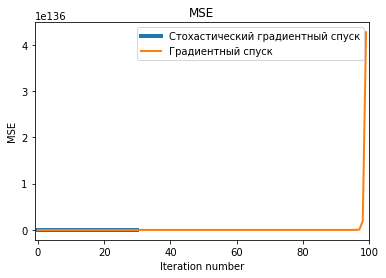

In [13]:
plotting(errors, errors_grad)

Вывод: Стохастический градиентный спуск сходится быстрее обычного градиентного спуска. 

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [14]:
#Градиентный спуск c регуляризацией
reg = 'l2'
W = np.zeros(10)
alpha = 0.2
n = X.shape[1]
y_pred_grad_l2, w_list_grad_l2, errors_grad_l2 = grad(reg, y, W, alpha, n)

In [15]:
# Стохастический градиентный спуск c регуляризацией
reg = 'l2'
w = np.zeros(10)
eta = 0.5
max_iter = 1e5
min_weight_dist = 1e-8
weight_dist = np.inf
w_list_stochastic_l2, errors_l2 = stoch_grad(reg, y, w, eta, max_iter, min_weight_dist, weight_dist)

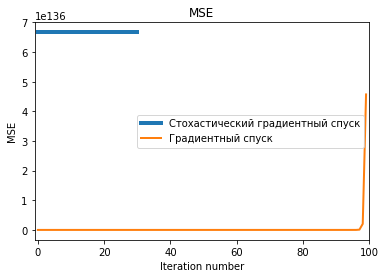

In [16]:
plotting(errors_l2, errors_grad_l2)

При использовании L2-регуляризации градиентный спуск показал себя лучше, чем стохастический градиентный спуск.

3. [опция] Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [17]:
#Градиентный спуск c регуляризацией
reg = 'l1'
W = np.zeros(10)
alpha = 0.2
n = X.shape[1]
y_pred_grad_l1, w_list_grad_l1, errors_grad_l1 = grad(reg, y, W, alpha, n)

In [18]:
reg = 'l1'
w = np.zeros(10)
eta = 0.5
max_iter = 1e5
min_weight_dist = 1e-8
weight_dist = np.inf
w_list_stochastic_l1, errors_l1 = stoch_grad(reg, y, w, eta, max_iter, min_weight_dist, weight_dist)

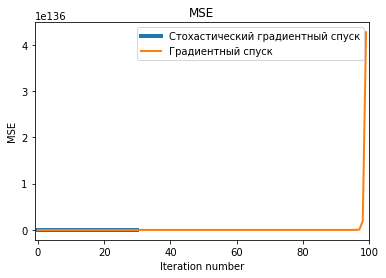

In [19]:
plotting(errors_l1, errors_grad_l1)